# **Mounting google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
#Importing keras
import keras

Using TensorFlow backend.


# **Defining the Path to the Dataset**

In [4]:
#path for the training directory
training_cat = '/content/drive/My Drive/Edwisor/Edwisor Project/Dataset/cats_dog_dataset/train/cats'
training_dog = '/content/drive/My Drive/Edwisor/Edwisor Project/Dataset/cats_dog_dataset/train/dogs'
#path for the validation directory
validation_cat = '/content/drive/My Drive/Edwisor/Edwisor Project/Dataset/cats_dog_dataset/test/cats'
validation_dog = '/content/drive/My Drive/Edwisor/Edwisor Project/Dataset/cats_dog_dataset/test/cats'

In [5]:
import os
# Directory with our training covid pictures
train_cat_dir = os.path.join(training_cat)

# Directory with our training normal pictures
train_dog_dir = os.path.join(training_dog)

# Directory with our validation covid pictures
validation_cat_dir = os.path.join(validation_cat)

# Directory with our validation normal pictures
validation_dog_dir = os.path.join(validation_dog)

# **Dataset files names and shape**

In [6]:
train_cat_names = os.listdir(train_cat_dir)
print(train_cat_names[:10])
train_dog_names = os.listdir(train_dog_dir)
print(train_dog_names[:10])

validation_cat_names = os.listdir(validation_cat_dir)
print(validation_cat_names[:10])
validation_dog_names = os.listdir(validation_dog_dir)
print(validation_dog_names[:10])

['cat.2087.jpg', 'cat.1301.jpg', 'cat.2163.jpg', 'cat.652.jpg', 'cat.2225.jpg', 'cat.1052.jpg', 'cat.59.jpg', 'cat.387.jpg', 'cat.972.jpg', 'cat.744.jpg']
['dog.2163.jpg', 'dog.2037.jpg', 'dog.543.jpg', 'dog.1286.jpg', 'dog.235.jpg', 'dog.1870.jpg', 'dog.2524.jpg', 'dog.75.jpg', 'dog.2333.jpg', 'dog.1.jpg']
['cat.11080.jpg', 'cat.9929.jpg', 'cat.11033.jpg', 'cat.11990.jpg', 'cat.11960.jpg', 'cat.10364.jpg', 'cat.11821.jpg', 'cat.10940.jpg', 'cat.11292.jpg', 'cat.10163.jpg']
['cat.11080.jpg', 'cat.9929.jpg', 'cat.11033.jpg', 'cat.11990.jpg', 'cat.11960.jpg', 'cat.10364.jpg', 'cat.11821.jpg', 'cat.10940.jpg', 'cat.11292.jpg', 'cat.10163.jpg']


In [7]:
print('total training cat images:', len(os.listdir(train_cat_dir)))
print('total training dog images:', len(os.listdir(train_dog_dir)))
print('total validation cat images:', len(os.listdir(validation_cat_dir)))
print('total validation dog images:', len(os.listdir(validation_dog_dir)))

total training cat images: 2000
total training dog images: 2000
total validation cat images: 600
total validation dog images: 600


# **Visualizing the images**

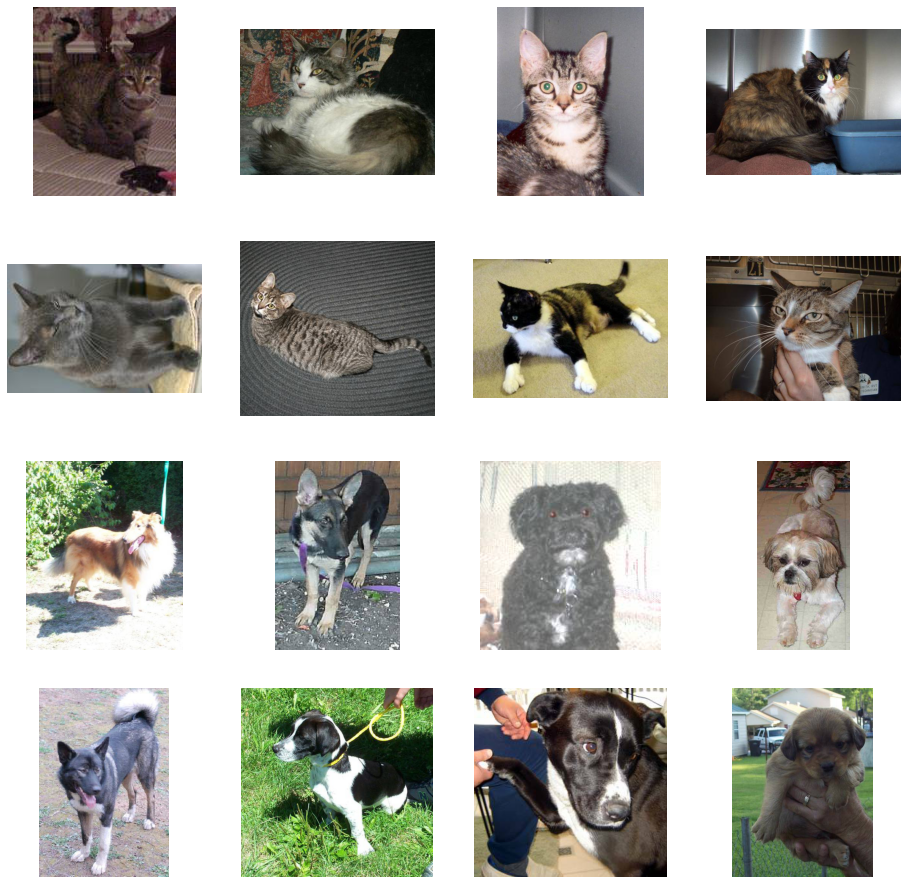

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cat_dir, fname) 
                for fname in train_cat_names[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dog_dir, fname) 
                for fname in train_dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# **Building a CNN Model**

In [8]:
#importing Tensorflow
import tensorflow as tf

In [9]:
#Defining the desired accuracy and adding CallBacks
DESIRED_ACCURACY = 0.999

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')>DESIRED_ACCURACY):
      print("\n Reached 99.9% accuracy so cancelling training!")
      self.model.stop_training=True

callbacks = myCallback()

In [10]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 64 neuron hidden layer
    tf.keras.layers.Dense(64, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cat') and 1 for the other ('dog')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

# **Data Pre-processing**

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Edwisor/Edwisor Project/Dataset/cats_dog_dataset/train',  # This is the source directory for training images
        target_size=(224, 224), 
        batch_size=400,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/My Drive/Edwisor/Edwisor Project/Dataset/cats_dog_dataset/test',  # This is the source directory for training images
        target_size=(224, 224),  
        batch_size=120,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


# **Training the model**

In [15]:
history = model.fit(
      train_generator,
      steps_per_epoch=10,  
      epochs=25,
      verbose=1,
      callbacks=[callbacks],
      validation_data = validation_generator,
      validation_steps=10)

Epoch 1/25
10/10 [==============================] - 22s 2s/step - loss: 0.3792 - accuracy: 0.8310 - val_loss: 0.6804 - val_accuracy: 0.6700
Epoch 2/25
10/10 [==============================] - 22s 2s/step - loss: 0.3783 - accuracy: 0.8215 - val_loss: 0.5774 - val_accuracy: 0.7008
Epoch 3/25
10/10 [==============================] - 22s 2s/step - loss: 0.3600 - accuracy: 0.8450 - val_loss: 0.5820 - val_accuracy: 0.7083
Epoch 4/25
10/10 [==============================] - 22s 2s/step - loss: 0.3680 - accuracy: 0.8298 - val_loss: 0.6158 - val_accuracy: 0.6908
Epoch 5/25
10/10 [==============================] - 22s 2s/step - loss: 0.3169 - accuracy: 0.8650 - val_loss: 0.5480 - val_accuracy: 0.7258
Epoch 6/25
10/10 [==============================] - 22s 2s/step - loss: 0.3194 - accuracy: 0.8690 - val_loss: 0.5906 - val_accuracy: 0.6992
Epoch 7/25
10/10 [==============================] - 22s 2s/step - loss: 0.2910 - accuracy: 0.8795 - val_loss: 0.5706 - val_accuracy: 0.7158
Epoch 8/25
10/10 [==

# **Prediction: Running the Model**

In [17]:
#prediction
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")
 

Saving cat00.jpeg to cat00.jpeg
Saving dog00.jpeg to dog00.jpeg
[0.]
cat00.jpeg is a cat
[1.]
dog00.jpeg is a dog


# **Visualizing Intermediate Representations**

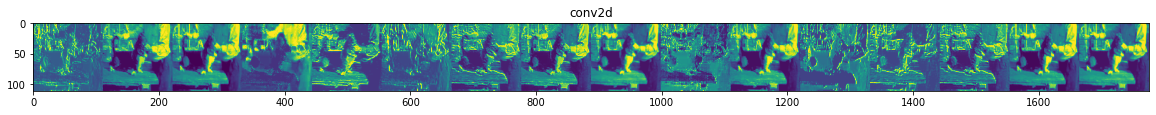

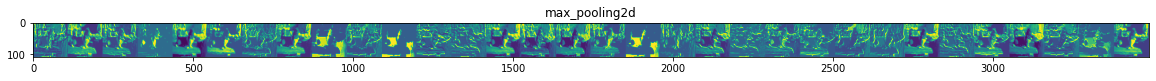

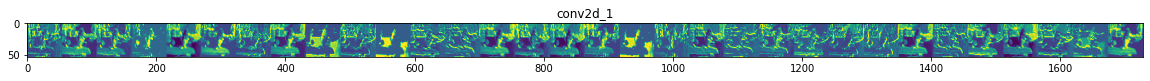

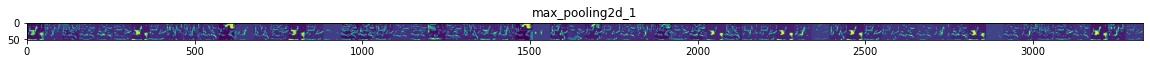

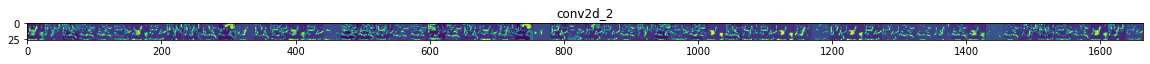

In [21]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
cat_files = [os.path.join(train_cat_dir, f) for f in train_cat_names]
dog_files = [os.path.join(train_dog_dir, f) for f in train_dog_names]
img_path = random.choice(cat_files + dog_files)

img = load_img(img_path, target_size=(224, 224)) 
x = img_to_array(img)  
x = x.reshape((1,) + x.shape)  

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# **Plotting of the training and testing loss and accuracy**

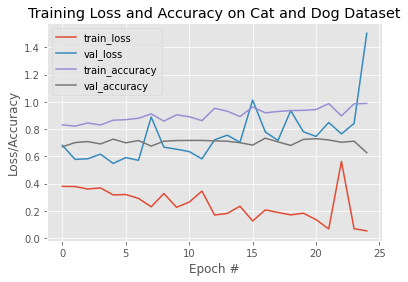

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
N = 25
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy on Cat and Dog Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
